In [1]:
from tokink import Ink, Tokinkizer
from tokink.processor import resample, scale, smooth, to_int

SCALE = 1 / 16
VOCAB_SIZE = 32_000
SAMPLE_EVERY = 2

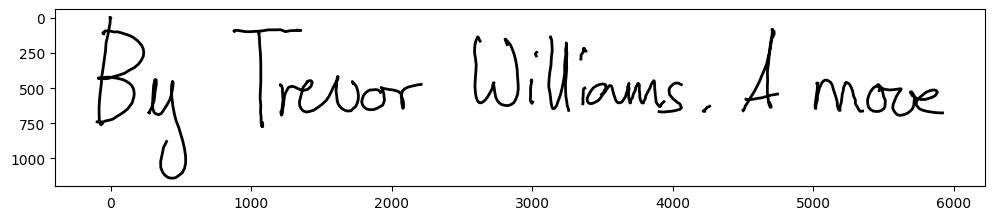

In [2]:
# Load example ink.
ink = Ink.example()
ink.plot()

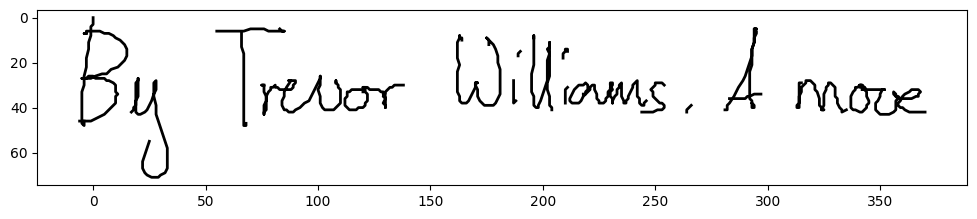

In [3]:
# Scale down ink and round coordinates to integers.
# Introduces artifacts but allows for better compression.
ink = scale(ink, SCALE)
ink = to_int(ink)
ink.plot()

Reduced ink from 855 points to 289 tokens


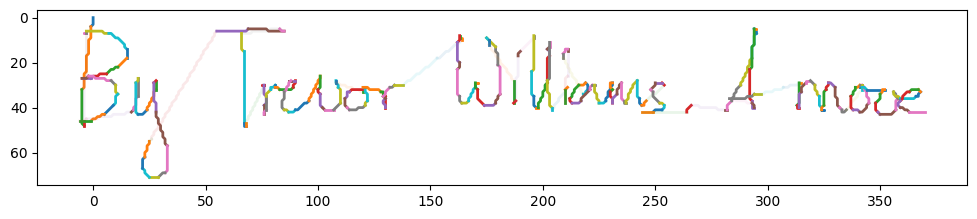

In [4]:
# Load tokenizer and tokenize ink.
tokenizer = Tokinkizer.from_pretrained(vocab_size=VOCAB_SIZE)
tokens = tokenizer.tokenize(ink)
print(f"Reduced ink from {len(ink)} points to {len(tokens)} tokens")
tokenizer.plot_tokens(tokens)

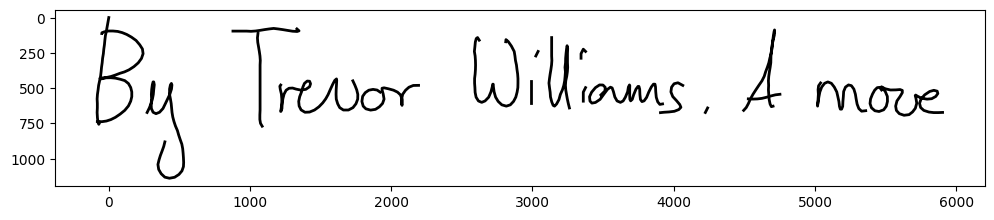

In [5]:
# Detokenize and postprocess mostly recovers original ink.
ink = tokenizer.detokenize(tokens)
ink = scale(ink, 1 / SCALE)
ink = resample(ink, SAMPLE_EVERY)
ink = smooth(ink)
ink.plot()